### **파이썬을 활용한 빅데이터 분석**

##### Chapter 10 기타 기계학습을 이용한 데이터 분석(K-Nearest Neighbors)

##### 2020710058 Applied Data Science Doo-yeonog, Lee

##### 10.2.3 KNN 실습

In [61]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [28]:
# Load Iris Data
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
df = pd.DataFrame(X, columns = iris.feature_names)
print('<Iris Data>')
print('The number of Data Samples:', len(df))
print('The number of Features:', len(df.columns))
print('The labels of the data:', np.unique(y))

<Iris Data>
The number of Data Samples: 150
The number of Features: 4
The labels of the data: [0 1 2]


In [55]:
# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print('The number of train data set:', len(X_train))
print('The number of test data set:', len(X_test))

The number of train data set: 100
The number of test data set: 50


In [56]:
# Learning Model
estimator = KNeighborsClassifier(n_neighbors = 3)
# Fitting the Model
estimator.fit(X_train, y_train)
# Predict the response
label_predict = estimator.predict(X_test)
# Evaluate accuarcy
print('The accuracy score of classification:', accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.98


In [57]:
# Perform 10 cross-validation

# Create odd list of k for KNN
myList = list(range(1, 50))
neighbors = [x for x in myList if x % 2 != 0]
print(neighbors)
print('The number of neighbors: ', len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The number of neighbors:  25


In [58]:
cv_scores = []
# Perfoem 10-fold cross validation
for k in neighbors:
    print('< K = %d >'%k)
    estimator = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print('The scores of classification are :', scores)
    cv_scores.append(scores.mean())
    print('The mean score of scores :', scores.mean())

< K = 1 >
The scores of classification are : [1.  0.9 1.  0.8 0.8 1.  1.  1.  1.  0.9]
The mean score of scores : 0.9400000000000001
< K = 3 >
The scores of classification are : [0.9 1.  1.  0.7 0.9 1.  1.  1.  1.  0.9]
The mean score of scores : 0.9400000000000001
< K = 5 >
The scores of classification are : [1.  1.  1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The mean score of scores : 0.9400000000000001
< K = 7 >
The scores of classification are : [1.  0.9 1.  0.7 1.  0.9 1.  1.  1.  0.9]
The mean score of scores : 0.9400000000000001
< K = 9 >
The scores of classification are : [0.9 1.  1.  0.7 1.  0.9 1.  1.  1.  0.9]
The mean score of scores : 0.9400000000000001
< K = 11 >
The scores of classification are : [1.  0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The mean score of scores : 0.9299999999999999
< K = 13 >
The scores of classification are : [0.9 0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The mean score of scores : 0.9200000000000002
< K = 15 >
The scores of classification are : [1.  0.9 1.  0.7 0.9 

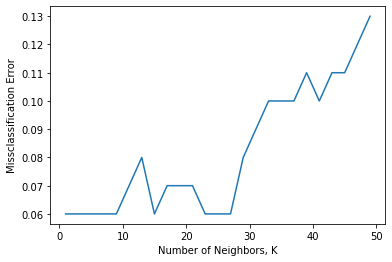

The optimal number of neighbors K is  1


In [64]:
# MSE
MSE = [1 - x for x in cv_scores]

# Plot of error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors, K')
plt.ylabel('Missclassification Error')
plt.show()

# Determine the Best K
min_MSE = min(MSE)
index_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_min_MSE]
print('The optimal number of neighbors K is ', optimal_k)